In [1]:
import pandas as pd
import sys
import os
sys.path.append("..")

data = pd.read_csv("../data/GOOG_historical_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5020 non-null   object 
 1   Open          5020 non-null   float64
 2   High          5020 non-null   float64
 3   Low           5020 non-null   float64
 4   Close         5020 non-null   float64
 5   Adj Close     5020 non-null   float64
 6   Volume        5020 non-null   int64  
 7   Dividends     5020 non-null   float64
 8   Stock Splits  5020 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 353.1+ KB


In [2]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


In [3]:
# Function to handle missing values
def handle_missing_values(data):
    data = data.ffill()  
    return data

handle_missing_values(data)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5015,2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0
5016,2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0
5017,2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0
5018,2024-07-29,170.500000,172.160004,169.720001,171.130005,171.130005,13768900,0.0,0.0


In [4]:
def analyze_statistics(data, columns):
    print(f"Statistics for GOOG:")
    print(data[columns].describe())

analyze_statistics(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

Statistics for GOOG:
              Open         High          Low    Adj Close        Close  \
count  5020.000000  5020.000000  5020.000000  5020.000000  5020.000000   
mean     45.251315    45.728793    44.800587    45.224493    45.274515   
std      43.338635    43.818298    42.918167    43.332534    43.377299   
min       2.470490     2.534002     2.390042     2.488082     2.490913   
25%      13.034705    13.145415    12.881592    13.017277    13.032090   
50%      26.982210    27.194902    26.791387    26.975230    27.005927   
75%      60.215126    60.758375    59.811811    60.211734    60.280252   
max     191.750000   193.309998   190.619995   192.660004   192.660004   

             Volume  
count  5.020000e+03  
mean   1.157539e+08  
std    1.497936e+08  
min    1.584340e+05  
25%    2.733950e+07  
50%    5.585480e+07  
75%    1.425333e+08  
max    1.650833e+09  


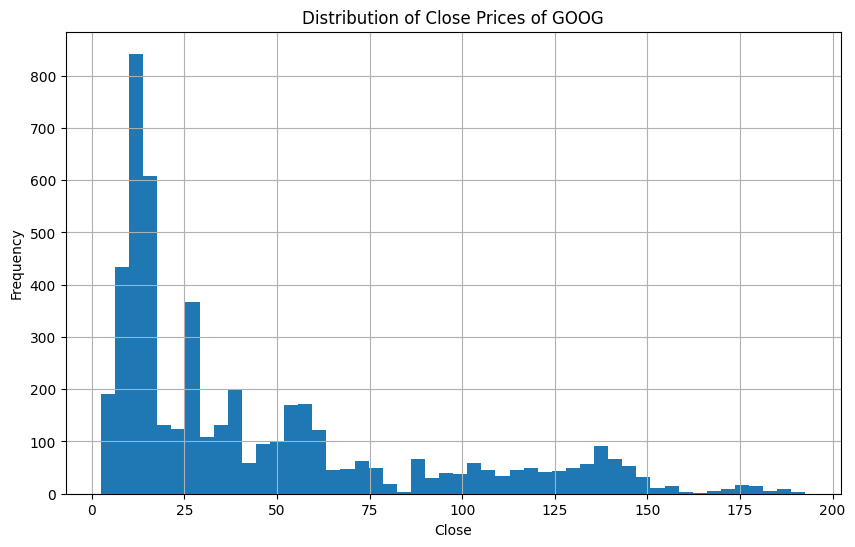

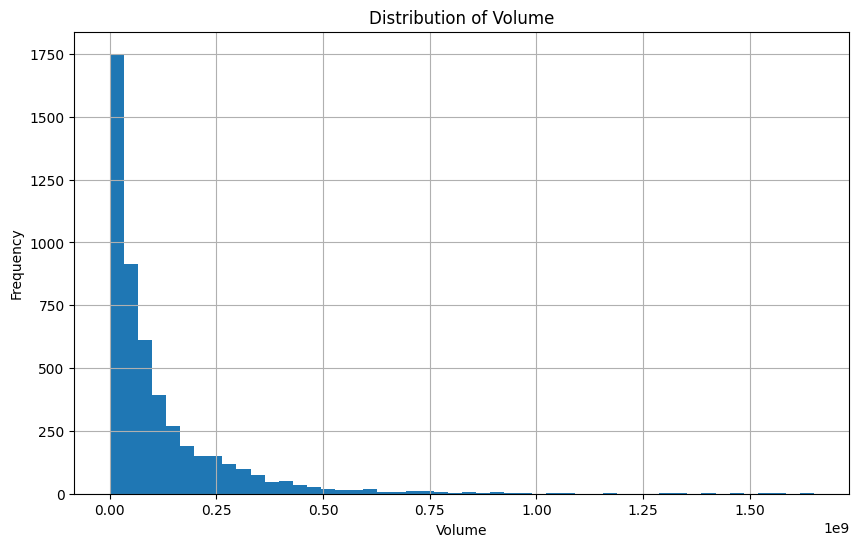

In [5]:
import matplotlib.pyplot as plt

def plot_distributions(data, column, bins=50, title="Distribution"):
    plt.figure(figsize=(10, 6))
    data[column].hist(bins=bins)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

plot_distributions(data, 'Close', title="Distribution of Close Prices of GOOG")
plot_distributions(data, 'Volume', title="Distribution of Volume")


Correlation Matrix for GOOG:
               Open      High       Low  Adj Close     Close    Volume
Open       1.000000  0.999915  0.999906   0.999798  0.999798 -0.465812
High       0.999915  1.000000  0.999893   0.999905  0.999905 -0.465038
Low        0.999906  0.999893  1.000000   0.999916  0.999916 -0.466803
Adj Close  0.999798  0.999905  0.999916   1.000000  1.000000 -0.465994
Close      0.999798  0.999905  0.999916   1.000000  1.000000 -0.466021
Volume    -0.465812 -0.465038 -0.466803  -0.465994 -0.466021  1.000000


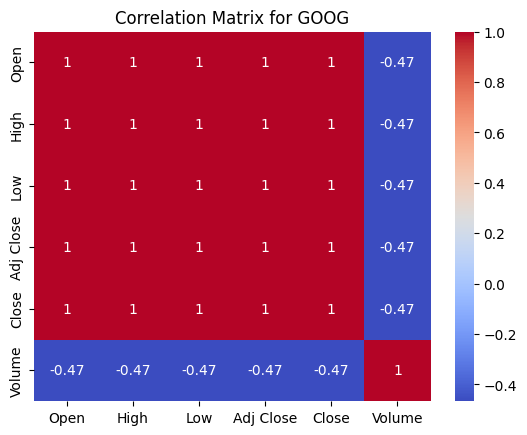

In [6]:
import seaborn as sns

def analyze_correlations(data, columns):
    correlation_matrix = data[columns].corr()
    print(f"\nCorrelation Matrix for GOOG:")
    print(correlation_matrix)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Correlation Matrix for GOOG")
    plt.show()
    
analyze_correlations(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

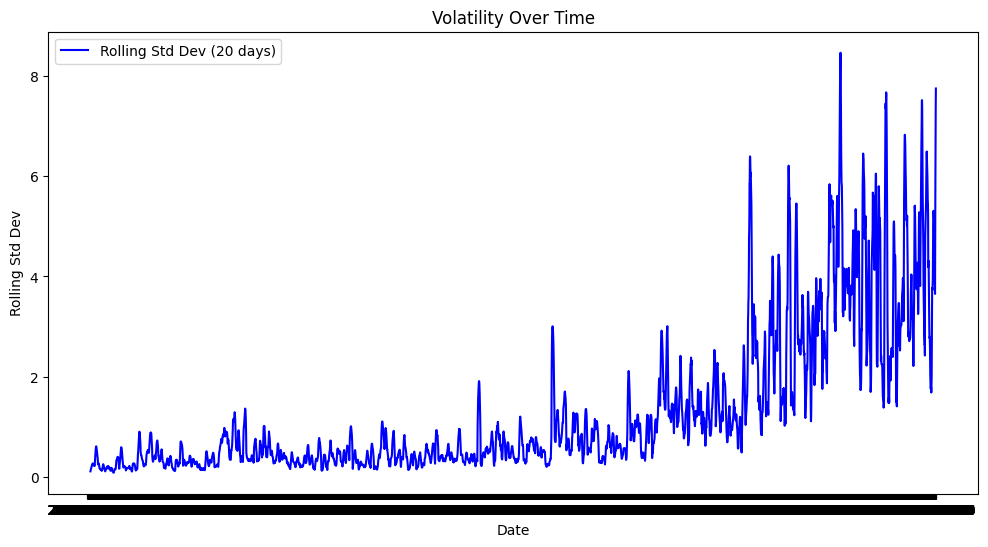

In [7]:
# Function to study volatility
def plot_volatility(data, value_col, date_col, window=20):
    data['Rolling_Std'] = data[value_col].rolling(window=window).std()
    plt.figure(figsize=(12, 6))
    plt.plot(data[date_col], data['Rolling_Std'], label=f"Rolling Std Dev ({window} days)", color='blue')
    plt.title("Volatility Over Time")
    plt.xlabel("Date")
    plt.ylabel("Rolling Std Dev")
    plt.legend()
    plt.show()

plot_volatility(data, 'Close', 'Date')

In [8]:
import pandas as pd
import talib as ta

import sys
import os
from IPython.display import display

# Load the stock data loader script
sys.path.append(os.path.abspath('./scripts'))
from scripts.load_stock_data import load_stock_data

# List of company names
company_names = ['GOOG']

# Dictionary to store stock data
stock_data = {}

# Load data for each company
for company in company_names:
    stock_data[company] = load_stock_data(f'../data/{company}_historical_data.csv')

# Define your apply_technical_indicators function
def apply_technical_indicators(df):
    # Calculate Simple Moving Average (SMA)
    df['SMA_20'] = ta.SMA(df['Close'], timeperiod=20)
    
    # Calculate Relative Strength Index (RSI)
    df['RSI_14'] = ta.RSI(df['Close'], timeperiod=14)
    
    # Calculate Moving Average Convergence Divergence (MACD)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(df['Close'], 
                                                              fastperiod=12, 
                                                              slowperiod=26, 
                                                              signalperiod=9)
    return df

# Apply technical indicators to each company's data
for company, data in stock_data.items():
    stock_data[company] = apply_technical_indicators(data)

# Display the first few rows of the data for each company
for company, data in stock_data.items():
    print(f"--- {company} ---")
    display(data.head())

--- GOOG ---


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,NaN,NaN,NaN,NaN,NaN


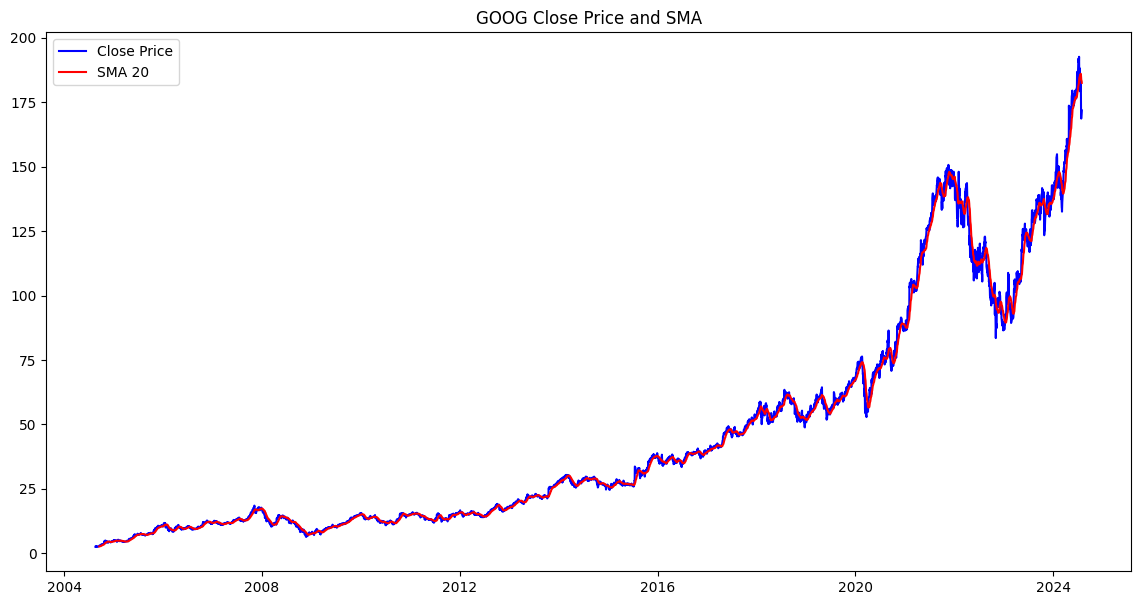

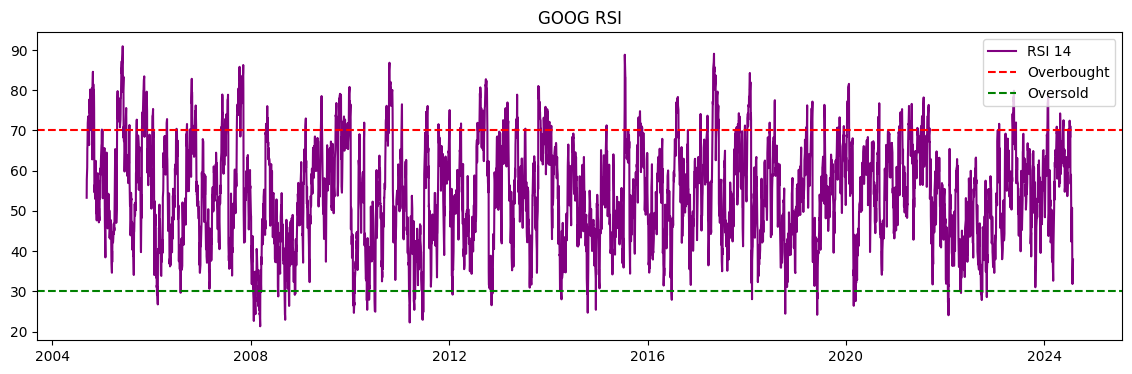

c:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


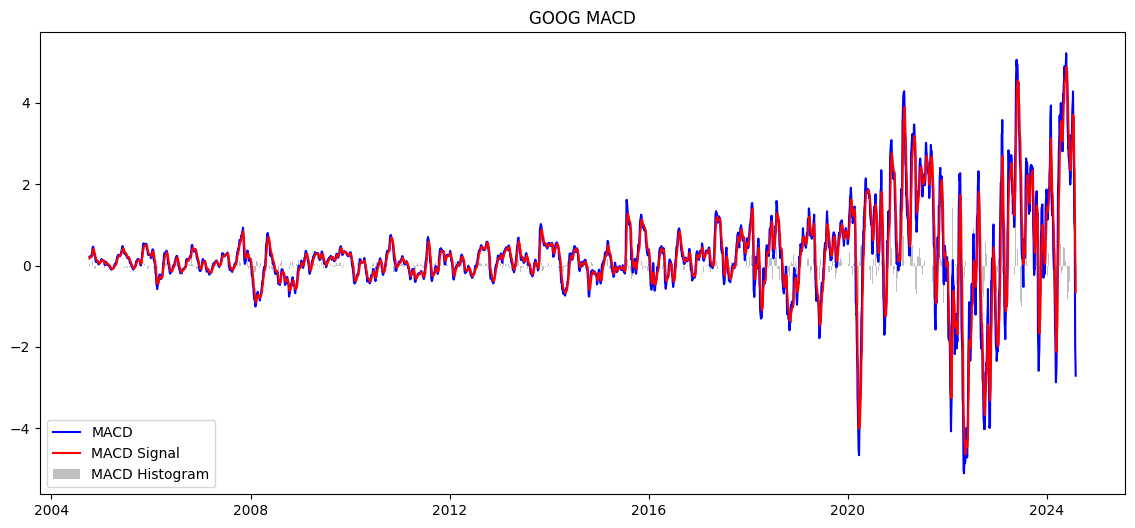

In [10]:
import matplotlib.pyplot as plt

# Choose a company to plot (e.g., 'AAPL')
company_to_plot = 'GOOG'
data = stock_data[company_to_plot]

# Plot Close Price and SMA
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_20'], label='SMA 20', color='red')
plt.title(f'{company_to_plot} Close Price and SMA')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(data['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title(f'{company_to_plot} RSI')
plt.legend()
plt.show()

# Plot MACD
plt.figure(figsize=(14, 6))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_signal'], label='MACD Signal', color='red')
plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title(f'{company_to_plot} MACD')
plt.legend()
plt.show()

In [17]:
data['Daily_Return'] = data['Adj Close'].pct_change()
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

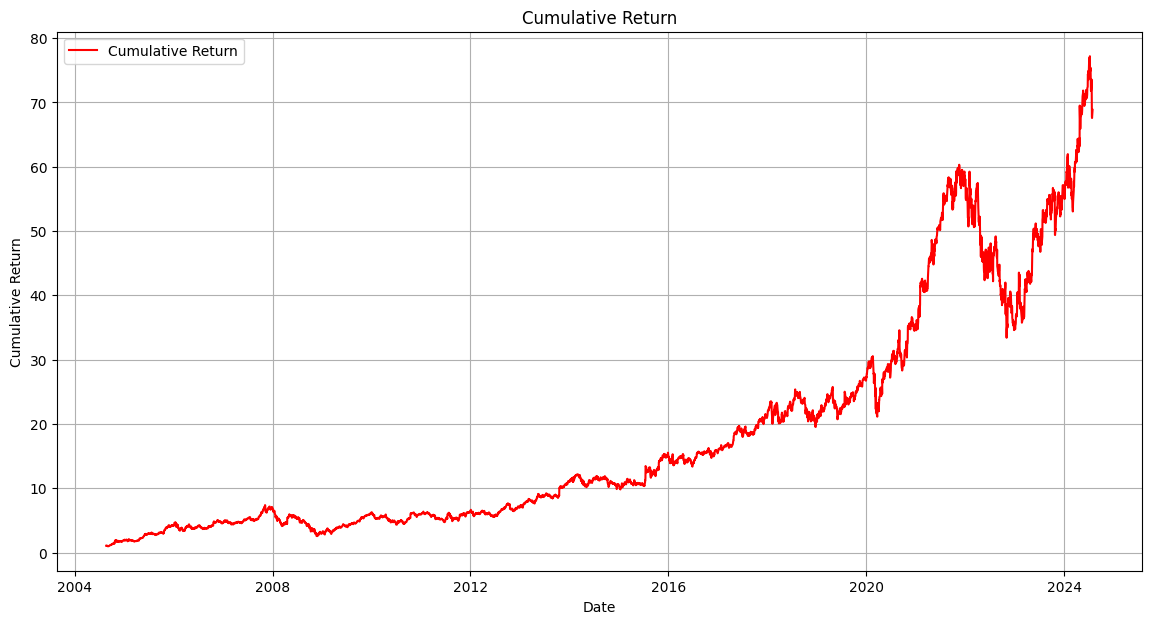

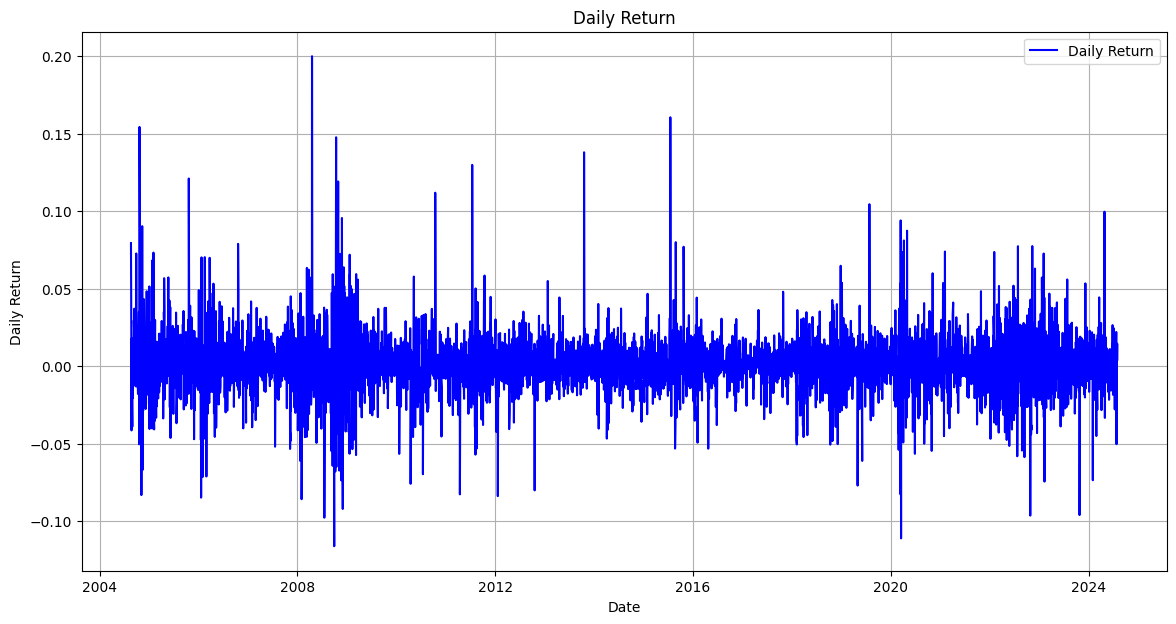

In [18]:
# Ensure 'Date' is a column and properly formatted
data.reset_index(inplace=True)  # Converts index to a column if 'Date' is in the index
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])  # Ensure it's in datetime format

# Define the plotting function
def plot_financial_metrics(data):
    """Plot daily returns and cumulative returns."""
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Cumulative_Return'], label='Cumulative Return', color='red')
    plt.title('Cumulative Return')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Daily_Return'], label='Daily Return', color='blue')
    plt.title('Daily Return')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function
plot_financial_metrics(data)